## Lógica Difusa o Fuzzy Logic

Es la lógica que utiliza expresiones que no son ni completamente ciertas ni falsas.La Fuzzy Logic se aplica a conceptos que pueden adquirir un valor cualquiera de veracidad dentro de un conjunto de valores que oscilan entre dos extremos:

*La verdad absoluta<br>
*La falsedad total

In [6]:
#Se importa la libreria 
from fcmeans import FCM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Código para cargar el Dataset
df=pd.read_csv('dynamic_api_call_sequence_per_malware_100_0_306.csv')
#visualización de los 10 primeros datos
df.head(10)

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1
5,cc6217be863e606e49da90fee2252f52,117,208,117,208,117,240,117,240,117,...,141,65,260,141,65,9,117,260,65,1
6,f7a1a3c38809d807b3f5f4cc00b1e9b7,215,274,158,215,274,158,215,172,117,...,117,240,117,172,60,81,60,81,225,1
7,164b56522eb24164184460f8523ed7e2,82,240,117,240,117,240,117,240,117,...,35,172,117,275,240,80,60,215,35,1
8,56ae1459ba61a14eb119982d6ec793d7,82,240,117,240,117,240,117,240,117,...,117,16,31,215,108,208,80,240,117,1
9,c4148ca91c5246a8707a1ac1fd1e2e36,82,208,187,208,172,117,172,208,16,...,117,172,117,208,172,117,100,215,35,1


In [9]:
#Transforacion de las caracteristicas
#Variable ojetiva y variable de entrada
y = df[['malware']]

#Separar las caracteristicas
X = df[['t_0', 't_1', 't_2', 't_3','t_4', 't_5', 't_6', 't_7', 't_8','t_9', 't_10', 't_11', 't_12', 't_13',
                  't_14', 't_15', 't_16', 't_17', 't_18','t_19', 't_20', 't_21', 't_22', 't_23','t_24', 't_25', 't_26', 't_27',
                  't_28','t_29', 't_30', 't_31', 't_32', 't_33','t_34', 't_35', 't_36', 't_37', 't_38','t_39', 't_40', 't_41',
                  't_42', 't_43','t_44', 't_45', 't_46', 't_47', 't_48','t_49', 't_50', 't_51', 't_52', 't_53','t_54', 't_55',
                  't_56', 't_57', 't_58','t_59', 't_60', 't_61', 't_62', 't_63','t_64', 't_65', 't_66', 't_67', 't_68','t_69',
                  't_70', 't_71', 't_72', 't_73','t_74', 't_75', 't_76', 't_77', 't_78','t_79', 't_80', 't_81', 't_82', 't_83',
                  't_84', 't_85', 't_86', 't_87', 't_88','t_89', 't_90', 't_91', 't_92', 't_93','t_94', 't_95', 't_96', 't_97',
                  't_98','t_99']]

### Estandarización de la data

In [13]:
#Se importa el metodo de scalado standar
from sklearn.preprocessing import StandardScaler
#Formar objeto de scala para entradas
VariablesEntradasScaler=StandardScaler()

In [16]:
#Almacenamiento del objeto de ajuste para referencia 

#Datos de entrada
VariablesEntradaFit=VariablesEntradasScaler.fit(X)

In [18]:
#Generación de los valores estandarizadios de x e y
#Datos de entrada

X=VariablesEntradaFit.transform(X)

In [19]:
#Se añade el modelo Fuzzy probabilistico
modelo_fuzzy = FCM(n_clusters=2, init=1.7, rndom_state=0, fuzzifier=2)
modelo_fuzzy.fit(X)

In [21]:
#Se obtiene los centroies
centers = modelo_fuzzy.centers
y_pred_fuzzy = modelo_fuzzy.predict(X)
y_pred_fuzzy

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## Evaluación

In [25]:
#Se obtiene el accurrcy del modelo fuzzy
from sklearn.metrics import accuracy_score
acc_score_fuzzy = accuracy_score(y, y_pred_fuzzy)
#Se imprime el accuracy
print(acc_score_fuzzy)

0.4692998450177774


In [28]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix,classification_report
cm_fuzzy = confusion_matrix(y, y_pred_fuzzy)
print (cm_fuzzy)

[[  380   699]
 [22586 20211]]


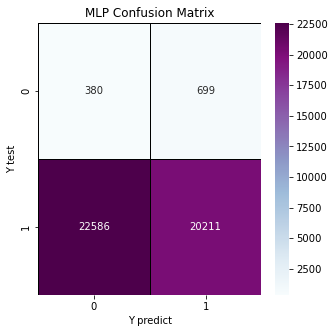

In [29]:
mlp_cm = confusion_matrix(y, y_pred_fuzzy)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('MLP Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()